In [206]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# abre el archivo CSV en modo lectura y crea un objeto de archivo CSV
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)

    # lee las filas del archivo CSV en una lista
    rows = []
    for row in csv_reader:
        rows.append(row)
        
data = np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=1)

dataSize = data.shape[0]  # numero de filas

# convierte la lista de filas en un array de NumPy
array = np.array(rows)

# imprime el array
#print(array)

# Convierte las columnas de texto a valores numéricos
X = array[1:, 5].astype(float).reshape(-1, 1)  # Pies cuadrados del espacio habitable interior
y = array[1:, 2].astype(float).reshape(-1, 1)  # Precio

# x va a ser la variable de pies cuadrados del espacio habitable interior
# Y va a ser la variable de precio

# agrega una columna de 1s a la matriz de características

Xr = np.hstack((np.ones_like(X), X))

print(Xr)
print(X.shape)
print(y.shape)

# JUSTAR EL POLINOMIO UTILIZANDO LA FUNCIÓN POLYFIT, LUEGO USAR LA FUNCIÓN POLY1D PARA MOSTRAR LAS FUNCIONES POLINOMALES

#f = np.polyfit(X[:,0], y[:,0], 2)
#p = np.poly1d(f)

# Imprime la función polinomial
# Esto significa que la línea de mejor ajuste proporcionada automáticamente por la función Polyfit

#print(p)




[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]
(21613, 1)
(21613, 1)


In [207]:
#funcion de regresion lineal
# retorna el costo de la regresión lineal y el gradiente
def linreg(X, y, t, cost, grad, a=0.1, n=100, onStep=None):
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))

        if onStep:
            onStep(t)

    return t, costs

In [208]:
# función de costo y gradiente para regresión lineal
# X = matriz de características
# y = vector de valores objetivo

cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

In [209]:


# Definimos el t inicial como un valor random
to = np.random.rand(Xr.shape[1], 1)

tf, costs = linreg(Xr,
                   y,
                   to,
                   cost,
                   grad,
                   a=0.0000000025,
                   n=100)

# Definimos el valor de xm  
xm = np.array([[0], [dataSize]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

# Definimos ym que es el valor de la funcion de regresion lineal
ym = xmr @ tf


to = np.random.rand(Xr.shape[1], 1) # Definimos el t inicial como un valor random.

to = to[~np.isnan(to)] # Elimina los valores NaN.
to = to.reshape((len(to), 1))

print(xm.shape, ym.shape)
print(xm)
print(tf)
print(ym)
print(xmr)




(2, 1) (2, 1)
[[    0]
 [21613]]
[[  0.26616795]
 [243.92701806]]
[[2.66167949e-01]
 [5.27199491e+06]]
[[1.0000e+00 0.0000e+00]
 [1.0000e+00 2.1613e+04]]


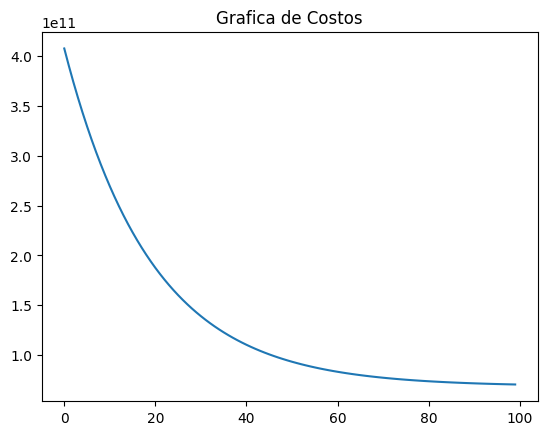

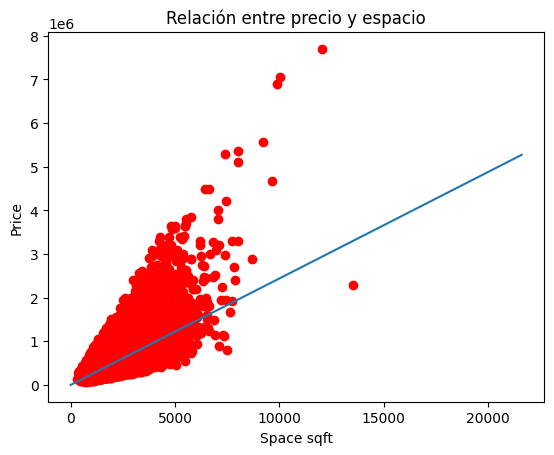

In [210]:
#grafica de los datos


plt.plot(costs)
plt.title("Grafica de Costos")
plt.show()

plt.plot(X, y, 'ro')
plt.plot(xm, ym)
plt.title("Relación entre precio y espacio")
plt.xlabel('Space sqft')
plt.ylabel('Price')
plt.show()



In [211]:
def split_folds(X, y, k):
    n = X.shape[0]
    fold_size = n // k
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    return [(np.vstack(X_folds[:i] + X_folds[i+1:]), np.vstack(y_folds[:i] + y_folds[i+1:]), X_folds[i], y_folds[i]) for i in range(k)]

def cross_validate(X, y, k):
    folds = split_folds(X, y, k)
    costs = []
    for X_train, y_train, X_test, y_test in folds:
        to = np.random.rand(X_train.shape[1], 1)
        tf, _ = linreg(X_train, y_train, to, cost, grad, a=0.0000000025, n=100)
        costs.append(cost(X_test, y_test, tf))
    return np.mean(costs)

k = 10
cost = cross_validate(X, y, k)

print('Promedio de costo en {}-fold cross-validation: {:.2f}'.format(k, cost))
# Graficar los valores de costo en función de k



Promedio de costo en 10-fold cross-validation: 70579854104.84
